In [16]:
import numpy as np
from Parallel_suite2p import ImageProcessor
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


assigning .h5 names: ['testerTifs']
searching the metadata info of the first tif
found 1 planes and 3 independent ROIs
Concatenating ROIs to verify image reconstruction: 


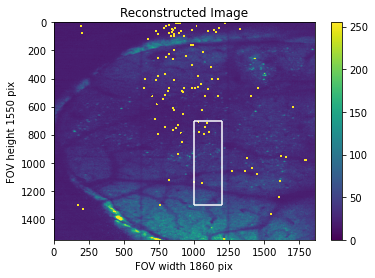

Directory already exists
found tif folder with 100 total tifs
found 3 mROIs of shape: (6, 1550, 620)
data reshaped as (6, 1550, 1860)
C:\Users\mora\Desktop\testerTifs//ImOut\HOLO_ROI_700_1300_1000_1200
Directory already exists
All saved, took 18.10 seconds
doing Mesoscan
changing some ops parameters using user info or tiff metadata 
 fs: 4.99038, nchannels: 1 
running single suite2p
Starting parallel processing, check anaconda prompt for suite2p logs!
sending parallel processor number 0
Will be processing this data : {'h5py': 'C:\\Users\\mora\\Desktop\\testerTifs//ImOut\\HOLO_ROI_700_1300_1000_1200//', 'h5py_key': ['data'], 'look_one_level_down': True, 'save_path0': 'C:\\Users\\mora\\Desktop\\testerTifs//ImOut\\HOLO_ROI_700_1300_1000_1200//', 'data_path': [], 'subfolders': [], 'fast_disk': []}
All saved, took 103.60 seconds, bye!


In [17]:
# Example Usage
tiff_folder_list = [r'C:\Users\mora\Desktop\testerTifs//']
exp_name_list = []

x_start = 1000 # HORIZONTAL
x_end = 1200 # HORIZONTAL
y_start = 700 # VERTICAL
y_end = 1300 # VERTICAL
Meso_suite2pOpsFile ='opsMeso.npy' # Filename of the ops file
suite2pOpsFile ='ops.npy' # Filename of the ops file

out_path =tiff_folder_list[0].split('/')[0] + '//ImOut'
channels = 1 # total channels (red/green)
channelOI= [0] # list of channels to keep: usually 0=Green, 1=Red
cropToHoloFOV = 1

# Initialize the class:
processor = ImageProcessor(tiff_folder_list, exp_name_list, (y_start, y_end), 
                           (x_start, x_end), out_path, channels, 
                           channelOI,cropToHoloFOV)
# Get metadata from the first tiff:
metadata = processor.get_metadata_info()
# Plot reconstructed image (OPTIONAL):
processor.plotReconstruction() # plot horizontally concatenated mROIs, this assumes they're the same size! you can skip it
# Repopulate some ops params using the metadata info:

processor.save_h5s()

if processor.meso_params['mesoscan']:
    print('doing Mesoscan')
    ops =np.load(Meso_suite2pOpsFile,allow_pickle=True).item()
else:
    print('doing Non-meso')
    ops =np.load(suite2pOpsFile,allow_pickle=True).item()
# # # run suite2p on each saved h5 in parallel
jobs = processor.run_parallel_processing(ops)